# Correction du TP 5 Images

## Fonctions outils

In [15]:
#%% Imports de bibliothèques


from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


#%% Outils fournis


def dimensions(pix):
    """Retourne les dimensions (Largeur, Hauteur) d'une matrice
    de pixels"""
    return len(pix[0]), len(pix) 

def matrice_to_image(pix, mode = '1', fichier='image.png', res=1):
    """Convertit en image  une matrice de pixels pix 
    de dimensions (ligne, colonnes)=(nline, ncol)
    en représentant sur l'écran chaque case de pix
    par un carré de coté resolution pixels.
    Le mode de l'image peut être :
    '1'  : binaire 0 ou 1
    'L' : niveaux de gris entre 0 et 255
    'RGB' : triplet de valeurs (Rouge, Vert, Bleu) entre 0 et 255
    Renvoie un objet image (format PIL)
    """
    #on force la conversion en type np.uint8 si pix est un tableau numpy
    if isinstance(pix, np.ndarray):
        pix = pix.astype(np.uint8)
     #précondition 1 : list doit être une matrice de pixels
    precondition1 = isinstance(pix, (list, np.ndarray))    and len(pix) > 0    and all(isinstance(pix[k], (list, np.ndarray))    and  len(pix[k]) == len(pix[0])  for k in range(len(pix)))
    assert precondition1, "Il faut passer en paramètre une matrice de pixels"
    #dimensions de la matrice de pixels
    largeur_pix, hauteur_pix = dimensions(pix)
    #préconditions sur la matrice de pixels pour respecter les contraintes du mode de l'image 
    precondition2 =  mode == '1' and  all(isinstance(pix[y][x], (int, np.uint8)) and 0 <= pix[y][x] <= 1  for y in range(hauteur_pix) for x in range(largeur_pix))
    precondition3 =  mode == 'L' and  all(isinstance(pix[y][x], (int, np.uint8)) and 0 <= pix[y][x] <= 255 for y in range(hauteur_pix) for x in range(largeur_pix))
    precondition4 = mode == 'RGB' and  all(isinstance(pix[y][x], (list, np.ndarray))  and len(pix[y][x]) == 3 and  all(isinstance(pix[y][x][k], (int, np.uint8))   and 0 <= pix[y][x][k] <= 255  for k in range(3))  for y in range(hauteur_pix) for x in range(largeur_pix))
    assert precondition2 or precondition3 or precondition4, "matrice de pixels et mode incompatibles !"    
    #dimensions de la matrice de pixels
    hauteur_newpix, largeur_newpix = res * hauteur_pix, res * largeur_pix
    #copie de pix sous forme de tableau numpy agrandi d'un coefficient res 
    if mode != 'RGB':
        newpix =  np.zeros((hauteur_newpix, largeur_newpix), dtype='uint8')
    else:
        newpix =  np.zeros((hauteur_newpix, largeur_newpix, 3), dtype='uint8')
    #initialsation des blocs de taille res * res de newpix
    #avec des 0 si pix[i][j] == 0 et 1 sinon
    for y in range(hauteur_newpix):
        for x in range(largeur_newpix):
            ypix = y // res
            xpix = x // res
            newpix[y][x] = pix[ypix][xpix]   
    if mode != 'RGB':
        #création d'un objet image PIL en mode binaire (pixel de valeur 0 ou 1)
        im = Image.new(mode, (largeur_newpix, hauteur_newpix))  #Image.new(mode, (Largeur, Hauteur))  
        #on remplit l'image avec les valeurs de newpix
        im.putdata(newpix.flatten())
    else:
        im = Image.fromarray(newpix)
    #enregistrement de l'image sur le disque 
    im.save(fichier)
    #renvoie l'image
    return im
    
def image_to_matrice(fichier):
    """
    Prend en paramètre le chemin vers un fichier image
    Renvoie sa représentation sous forme de matrice de pixels    
    """
    #ouverture de l'image avec PIL
    im = Image.open(fichier)
    #conversion de l'image en matrice de pixels / tableau numpy
    pix = np.array(im, dtype = np.uint8)
    #conversion de la matrice de pixels en liste Python
    pix = pix.tolist()
    return pix

def matrice_nulle(ncol, nlig, mode = "L"):
    """Retourne une matrice de pixels de n lignes et m colonnes
    représentant une image noire dans le mode  d'image choisi"""
    assert mode in ['1', 'L', 'RGB'], "mode doit appartenir à ['1', 'L', 'RGB']"
    if mode in ['1', 'L']:
        return [[0 for x in range(ncol)] for y in range(nlig)]
    else:               
        return [[[0,0,0] for x in range(ncol)] for y in range(nlig)]

## Exercice 2

In [16]:
from typing import List, Tuple

def est_matrice(mat:List[List[int]])->bool:
    """Paramètre : un tableau 2d  d'entiers
    Précondition : len(mat) > 0 et  len(mat[0]) > 0
    Valeur renvoyée : un booléen
    Postcondition : détermine si toutes les lignes sont de même dimension
    """
    assert len(mat) > 0 and len(mat[0]) > 0
    m = len(mat[0])
    for ligne in mat:
        if len(ligne) != m:
            return False
    return True
    
def dimensions(mat:List[List[int]])->Tuple[int, int]:
    """Paramètre : un tableau 2d représentant une matrice d'entiers
    Précondition : est_matrice(mat)
    Valeur renvoyée : tuple d'entiers
    Postcondition : renvoie (len(mat[0]), len(mat))"""
    assert est_matrice(mat)
    return (len(mat[0]), len(mat))

#tests unitaires
assert dimensions([[1],[2]]) == (1, 2)
assert dimensions([[1, 2, 3],[4, 5, 6]]) == (3, 2)


def matrice_nulle(nbcol:int, nblig:int)->List[List[int]]:
    """Paramètres : nombres entiers de colonnes et de lignes
    Précondition : nbcol > 0 et nblig > 0
    Valeur renvoyée : matrice d'entiers
    Postcondition : matrice nulle de nbcol colonnes et nblig lignes"""
    return [[0 for j in range(nbcol)] for i in range(nblig)]

#tests unitaires
assert matrice_nulle(2, 1) == [[0, 0]]
assert matrice_nulle(1, 2) == [[0], [0]]
assert matrice_nulle(3, 2) == [[0,0, 0], [0,0,0]]


def produit_hadamard(mat1:List[List[int]], mat2:List[List[int]])->List[List[int]]:
    """Paramètre : un tableau 2d représentant une matrice d'entiers
    Précondition : dimensions(mat1) == dimensions(mat2)
    Valeur renvoyée : matrice d'entiers
    Postcondition : renvoie le produit de Hadamard de mat1 et mat2"""
    assert dimensions(mat1) == dimensions(mat2)
    nbcol, nblig = dimensions(mat1) 
    mat3 = matrice_nulle(nbcol, nblig)
    for i in range(nblig):
        for j in range(nbcol):
            mat3[i][j] = mat1[i][j] * mat2[i][j] 
    return mat3
    
#tests unitaire
assert produit_hadamard([[1,2, 3],[4,5, 6]], [[2,0, -2],[-1,1, -2]]) == [[2,0, -6],[-4, 5, -12]]


def produit_matriciel(mat1:List[List[int]], mat2:List[List[int]])->List[List[int]]:
    """Paramètre : un tableau 2d représentant une matrice d'entiers
    Précondition : dimensions(mat1)[1] == dimensions(mat2)[0]
    Valeur renvoyée : matrice d'entiers
    Postcondition : renvoie le produit matriciel de mat1 .mat2"""
    assert dimensions(mat1)[0] == dimensions(mat2)[1]
    p = dimensions(mat1)[0] 
    nbcol, nblig = dimensions(mat2)[0], dimensions(mat1)[1]
    mat3 = matrice_nulle(nbcol, nblig)
    for i in range(nblig):
        for j in range(nbcol):
            somme = 0
            for k in range(p):
                somme = somme + mat1[i][k] * mat2[k][j] 
            mat3[i][j] = somme
    return mat3
    
#test unitaire
assert produit_matriciel([[1,2],[3, 4], [5, 6]], [[1, 2],[1, -1]]) == [[ 3,  0],[ 7,  2],  [11,  4]]

# Exercice 3

In [8]:
#à tester dans http://pythontutor.com/visualize.html

M = [ [0, 0, 0] for i in range(3) ]
N = M
P = [e for e in M ]
Q = [ e[:] for e in M ]
M[2][1] = 3


<div style="border:1pt solid slateblue; border-radius:5pt; color:slateblue; padding:3px; background-color: lightcyan"> 

<a target="_blank" href="https://pythontutor.com/visualize.html#code=M%20%3D%20%5B%20%5B0,%200,%200%5D%20for%20i%20in%20range%283%29%20%5D%0AN%20%3D%20M%0AP%20%3D%20%5Be%20for%20e%20in%20M%20%5D%0AQ%20%3D%20%5B%20e%5B%3A%5D%20for%20e%20in%20M%20%5D%0AM%5B2%5D%5B1%5D%20%3D%203&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false">
Code Python Tutor</a>
</div>



# Exercice 4

Pour générer une croix noire.

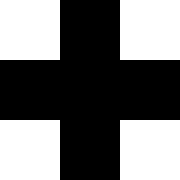

In [17]:
matrice_to_image([[1,0,1],[0,0,0],[1,0,1]], mode = '1', fichier='croix_binaire_60.png',res=60)

Pour générer une croix quadricolore.

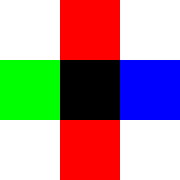

In [18]:
rouge = [255,0,0]
bleu = [0, 0, 255]
vert = [0, 255, 0]
noir = [0,0,0]
blanc = [255,255,255]
matrice_to_image([[blanc,rouge,blanc],[vert,noir,bleu],[blanc,rouge,blanc]], mode = 'RGB', fichier='croix_rgb_60.png',res=60)

# Exercice 5

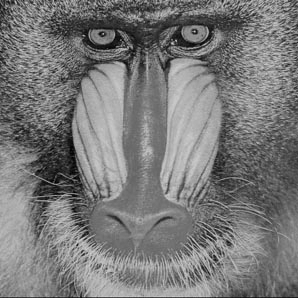

In [25]:
from typing import List 

def luminance(rgb:List[int])->int:
    """Paramètre : un tableau de 3 entiers [r,g,b]
    Précondition : 0 <= r < 255 et 0 <= g < 255 et 0 <= b < 255 
    Valeur renvoyée : un entier
    Postcondition : renvoie la luminance 0.299*r+0.587*g+0.114*b"""     
    r, g, b = rgb
    assert 0 <= r <= 255 and 0 <= g <= 255 and 0 <= b <= 255
    return int(0.299*r + 0.587*g + 0.114*b)

def matrice_rgb_to_gris(pix:List[List[List[int]]])->List[List[int]]:
    """Précondition: pix une matrice de pixels rgb
    Valeur renvoyée: une matrice de pixels en niveaux de gris
    Postcondition : renvoie une matrice des luminances des pixels sources
    """
    ncol, nlig = dimensions(pix)
    pix_but = matrice_nulle(ncol, nlig)
    for i in range(nlig):
        for j in range(ncol):
            pix_but[i][j] = luminance(pix[i][j])
    return pix_but
            
#test
mandrill_rgb = image_to_matrice('mandrill.png')
mandrill_gris = matrice_rgb_to_gris(mandrill_rgb)
matrice_to_image(mandrill_gris, mode = 'L', fichier='mandrill_gris.png', res=1)

In [36]:
## Q2

from typing import List

def melange_pixel_gris(p1:int, p2:int, coef:float)->int:
    """Précondition : 0 <= p1 < 255 et 0 <= p2 < 255 et 0 <= coef <= 1
    Postcondition : renvoie int(p1 * coef + (1-coef) * p2)"""
    assert  0 <= p1 < 255 and 0 <= p2 < 255 and 0 <= coef <= 1
    return int(p1 * coef + (1-coef) * p2)

def melange_matrice_gris(pix1:List[List[int]], pix2:List[List[int]], coef:float)->List[List[int]]:
    """Précondition : pix1 et pix2 deux matrices de pixels en niveaux de gris
    de mêmes dimensions et 0 <= coef <= 1"""
    assert  0 <= coef <= 1
    ncol, nlig = dimensions(pix1)
    assert nlig, ncol == dimensions(pix2)
    pix3 = matrice_nulle(ncol, nlig)
    for i in range(nlig):
        for j in range(ncol):
            pix3[i][j] = melange_pixel_gris(pix1[i][j], pix2[i][j], coef)
    return pix3

def melange_progressif(pix1:List[List[int]], pix2:List[List[int]], n:int)->None:
    for k in range(n + 1):
        im = matrice_to_image(melange_matrice_gris(pix1, pix2,  k/n), mode='L', fichier=f"melange{k}.png")
        im.show()

darwin = image_to_matrice("darwin_gris.png")
mandrill = image_to_matrice("mandrill_gris.png")
#melange_progressif(darwin, mandrill, 10)
collection = [matrice_to_image(melange_matrice_gris(darwin, mandrill,  k/10), mode='L') for k in range(11)]

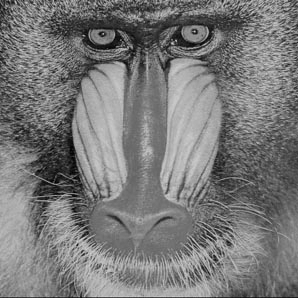

In [33]:
collection[0]

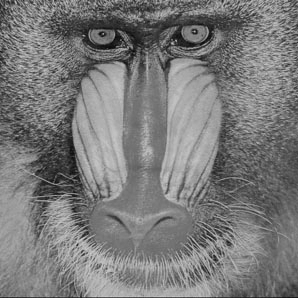

In [34]:
collection[1]

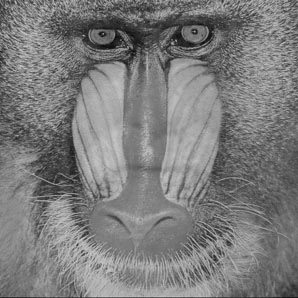

In [35]:
collection[2]

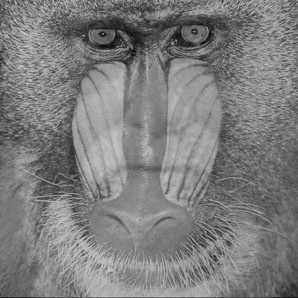

In [37]:
collection[3]

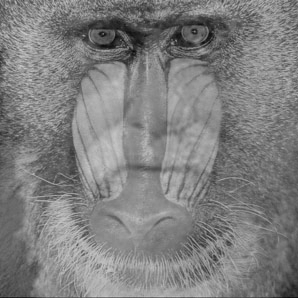

In [38]:
collection[4]

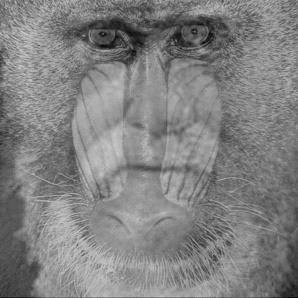

In [39]:
collection[5]

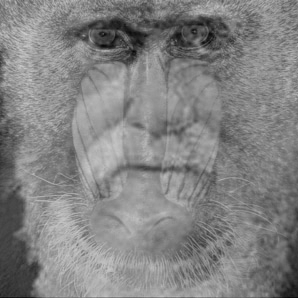

In [40]:
collection[6]

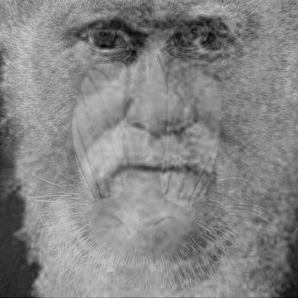

In [41]:
collection[7]

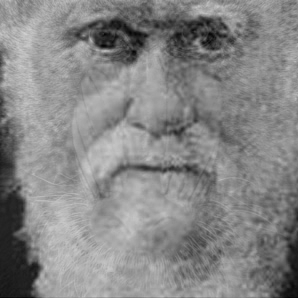

In [42]:
collection[8]

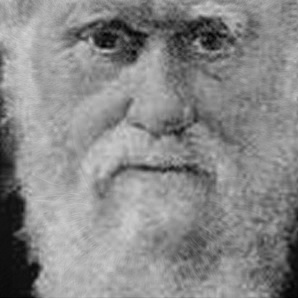

In [43]:
collection[9]

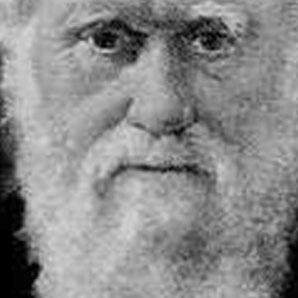

In [44]:
collection[10]

# Exercice 6

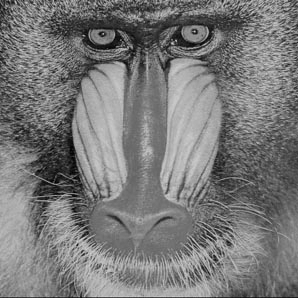

In [47]:
from  typing import List

def changement_echelle(pix:List[List[int]], coef:float)->List[List[int]]:
    """Précondition: pix une matrice de pixels rgb
    Valeur renvoyée: une matrice de pixels en niveaux de gris
    Postcondition : renvoie une matrice de l'image obtenue par changement d'échelle
    de coefficient coef"""
    ncol, nlig = dimensions(pix)
    ncol_but, nlig_but = int(ncol * coef), int(nlig * coef)
    pix_but = matrice_nulle(ncol_but, nlig_but)
    for i in range(nlig_but):
        for j in range(ncol_but):
            pix_but[i][j] = pix[int(i/coef)][int(j/coef)]
    return pix_but

# tests
mandrill_gris = image_to_matrice('mandrill_gris.png')
im = matrice_to_image(mandrill_gris, mode = 'L')
im

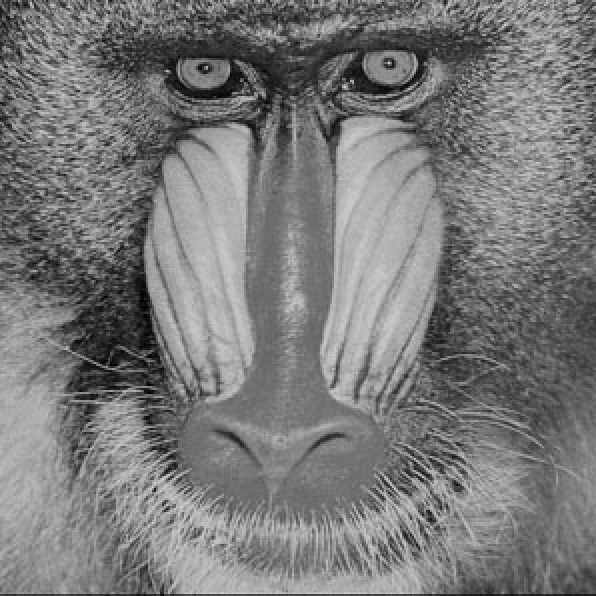

In [30]:
mandrill_gris_double = changement_echelle(mandrill_gris, 2)
im_double = matrice_to_image(mandrill_gris_double , mode = 'L', fichier='mandrill_gris_double.png', res=1)
im_double

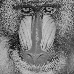

In [31]:
mandrill_gris_quart = changement_echelle(mandrill_gris, 0.25)
im_quart = matrice_to_image(mandrill_gris_quart, mode = 'L', fichier='mandrill_gris_quart.png', res=1)
im_quart

# Exercice 7

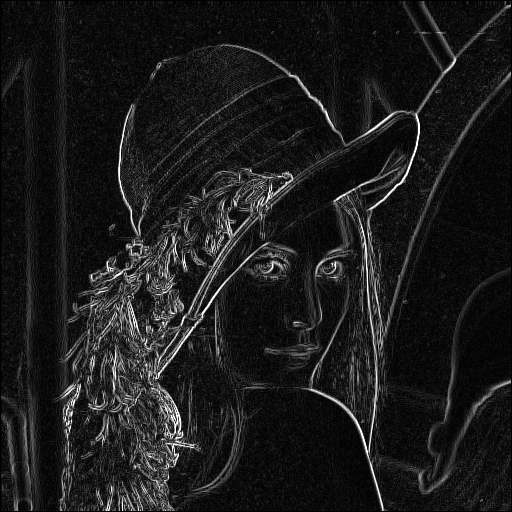

In [45]:
from typing import List, Callable
import math


sobel_vertical = [[-1, -2, -1],
                   [0,0,0],
                   [1, 2, 1]]

sobel_horizontal = [[-1,0,1],
                    [-2,0,2],
                    [-1,0,1]]

def normalise(val:float)->int:
    """Postcondition : renvoie  0 si val <= 0
    ou la  partie entière de val si 0 <= val <= 255 
    et 255 sinon"""
    return int(min(max(0, val), 255))



def convolution_bloc3(pix:List[List[int]], x:int, y:int, mat_conv:List[List[int]])->int:   
    """Paramètres :
    - pix une matrice de pixels
    - x et y deux entier désignant les coordonnées d'un pixel de pix
    - mat_conv une matrice de convolution 3 x 3
    Préconditions :  0 <= y < len(pix)  et 0 <= x < len(pix[y])
    Postcondition : Renvoie le produit de convolution de mat_conv
    par le voisinage carré 3x3 du pixel en (x,y)"""
    somme = 0
    for dx in range(-1, 2):
        for dy in range(-1, 2):
            somme = somme + pix[y + dy][x + dx] * mat_conv[dy][dx]
    return somme

def filtre_contour_sobel(pix:List[List[int]], x, y)->int:  
    """Paramètres :
    - pix une matrice de pixels
    - x et y deux entier désignant les coordonnées d'un pixel de pix
    Préconditions :  0 <= y < len(pix)  et 0 <= x < len(pix[y])
    Postcondition : renvoie l'entier  calculé par le filtre de Sobel
    pour le pixel en (x, y), voir l'énoncé et https://fr.wikipedia.org/wiki/Filtre_de_Sobel"""
    return normalise(math.sqrt(convolution_bloc3(pix, x,y, sobel_horizontal) ** 2 \
                           + convolution_bloc3(pix, x,y, sobel_vertical)** 2))


def detection_contour(pix:List[List[int]], filtre_contour:Callable[[List[List[int]],int,int],int])->List[List[int]]:
    """Paramètres :
    - pix une matrice de pixels
    - filtre_contour une fonction qui peut modifier la valeur d'un pixel 
      en marquant les pixels de contour, les pixels du bord ne sont pas traités
    Postcondition: Renvoie une nouvelle matrice de pixels pix_but
    obtenue en appliquant filtre_contour à chaque pixel de coordonnées (x,y)"""  
    ncol, nlig = dimensions(pix)
    pix_but = matrice_nulle(ncol, nlig)
    for x in range(1, ncol - 1): #boucle sur les colonnes
        for y in range(1, nlig - 1): #boucle sur les lignes
            pix_but[y][x] = filtre_contour(pix, x, y)
    return pix_but

# code client
lena_gris = image_to_matrice('lena.png')
lena_contour_sobel = detection_contour(lena_gris, filtre_contour_sobel)
matrice_to_image(lena_contour_sobel, fichier='lena-contour-sobel.png', res=1, mode='L')
